In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../')
import satpass
from misc import * 

In [9]:
sw = satpass.NominalTrack(mission='sw')

In [ ]:
domain = np.array([148,158,-59,-52])

date_range = [pd.Timestamp('2023-11-01'), pd.Timestamp('2023-12-31')]

swot_passes = satpass.sat_pass('sw', date_range, list(domain + np.array([-1,1,-1,1])))
swot_passes = assign_subcycles(swot_passes, threshold=pd.Timedelta(days = 1.1), remove_incomplete=False) ## Assign subcyle (~ 10 days subcycles with ~ 5 day ascending/5 day descending)
swot_passes.subcycle = swot_passes.subcycle + (swot_passes.direction == 'des')*0.5
swot_tracks = sw.select_in_area(list(domain))

In [21]:
domain = (145,160,-59,-51)
sw = satpass.NominalTrack(mission='sw') # "swi" for fast sampling phase

In [41]:
# A 21-day SWOT cycle can be split into two ~10.5-day half-cycles 
# and four ~5.25-day quarter-cycles. We label quarter-cycles as 
# 0, 0.5, 1.0, 1.5: integers (0, 1) denote ascending tracks, 
# half-integers (0.5, 1.5) denote descending tracks.

subcycles = np.unique(swot_passes.subcycle)
subcycles ### All ~5-day subcycles during the given period

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [47]:
### e.g. for one subcycle

subcycle = subcycles[0]
swot_subcycle = swot_passes[swot_passes.subcycle == subcycle]
swot_subcycle

,track,direction,cycle,time,subcycle
time,,,,,
2023-11-05 01:29:00,71,asc,6.0,2023-11-05 01:29:00,0.0
2023-11-06 01:30:00,99,asc,6.0,2023-11-06 01:30:00,0.0
2023-11-07 01:31:00,127,asc,6.0,2023-11-07 01:31:00,0.0
2023-11-08 01:31:00,155,asc,6.0,2023-11-08 01:31:00,0.0
2023-11-09 01:32:00,183,asc,6.0,2023-11-09 01:32:00,0.0
2023-11-10 01:33:00,211,asc,6.0,2023-11-10 01:33:00,0.0
2023-11-11 01:34:00,239,asc,6.0,2023-11-11 01:34:00,0.0


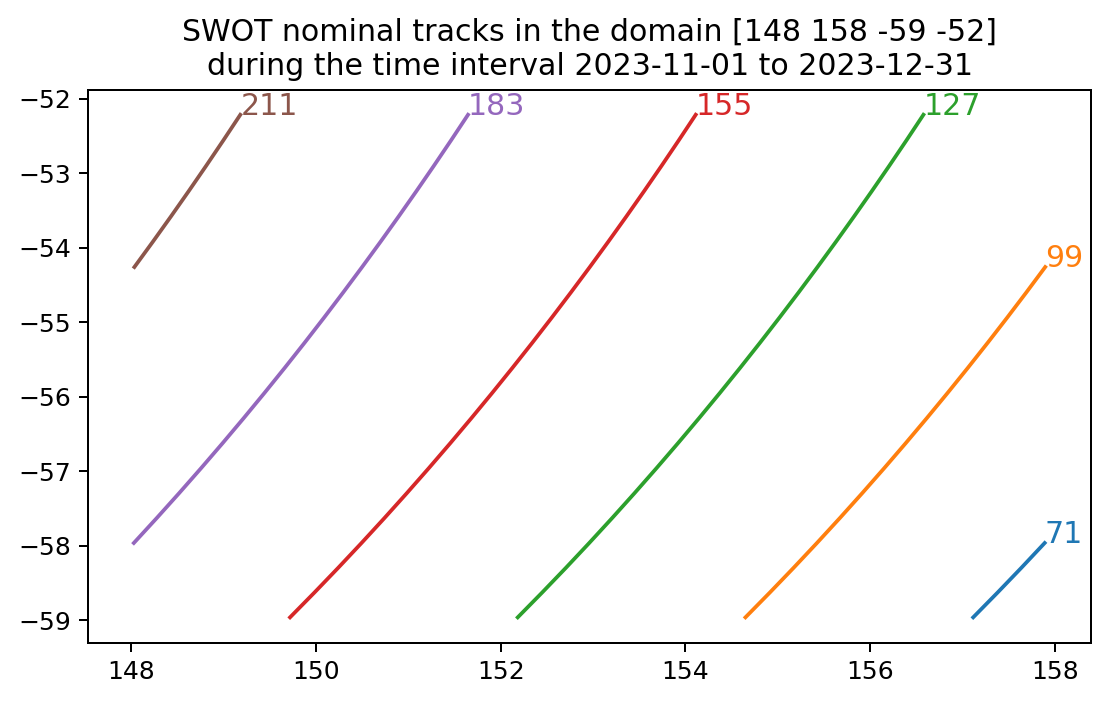

In [ ]:
plt.figure(figsize = (12, 4), dpi = 180)

plt.subplot(121)

for track in swot_subcycle.track:
    if track in swot_tracks.track.values:
        df = swot_tracks[swot_tracks.track == track]
        im = plt.plot(df.lon, df.lat)[0]
        c = im.get_color()
        plt.text(df.lon.values[-1], df.lat.values[-1], track, c = c, fontsize = 12)

plt.title(f'SWOT nominal tracks in the domain {domain}\nduring the time interval {date_range[0].date()} to {date_range[1].date()}')
plt.tight_layout()

#### Exemple : Subcycles in a ACC region (4 per 21 days cycle)

In [55]:
domain = (145,160,-59,-51)
sw = satpass.NominalTrack(mission='sw') # "swi" for fast sampling phase

date_range = [pd.Timestamp('2023-11-01'), pd.Timestamp('2023-12-31')]

swot_passes = satpass.sat_pass('sw', date_range, list(domain + np.array([-1,1,-1,1])))
swot_passes = assign_subcycles(swot_passes, threshold=pd.Timedelta(days = 1.1), remove_incomplete=False) ## Assign subcyle (~ 10 days subcycles with ~ 5 day ascending/5 day descending)
swot_passes.subcycle = swot_passes.subcycle + (swot_passes.direction == 'des')*0.5
swot_tracks = sw.select_in_area(list(domain))

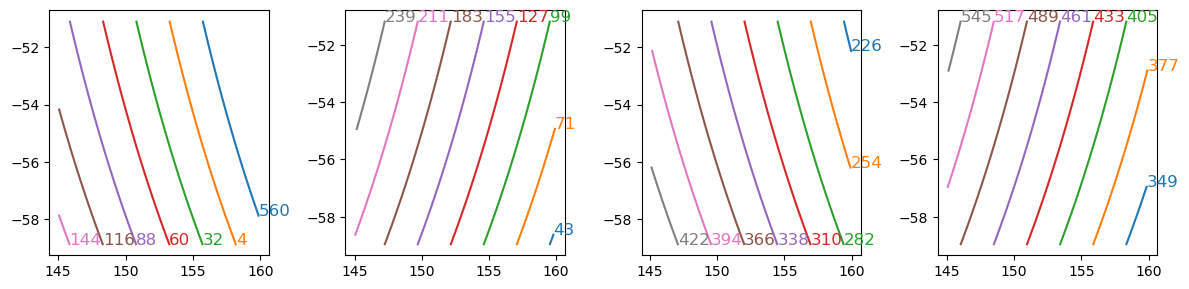

In [58]:
subcycles = np.unique(swot_passes.subcycle)

plt.figure(figsize = (12,3))
for i, subcycle in enumerate(subcycles[1:5]):
    swot_subcycle = swot_passes[swot_passes.subcycle == subcycle]
    plt.subplot(1,4,i+1)
    for track in swot_subcycle.track:
        if track in swot_tracks.track.values:
            df = swot_tracks[swot_tracks.track == track]
            im = plt.plot(df.lon, df.lat)[0]
            c = im.get_color()
            plt.text(df.lon.values[-1], df.lat.values[-1], track, c = c, fontsize = 12)

plt.tight_layout()